Import  packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Data analysis

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

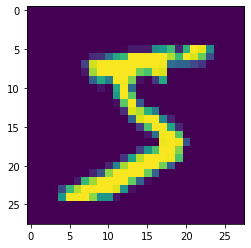

In [6]:
plt.imshow(X_train[0])

Data Pre-processing

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create model

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2377 - accuracy: 0.9523 - val_loss: 0.0928 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0656 - accuracy: 0.9803 - val_loss: 0.0910 - val_accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.1193 - val_accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.1116 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 106s 56ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.1173 - val_accuracy: 0.9748


Test the model

In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11725354194641113, 0.9747999906539917]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 82ms/step
[[2.0987019e-13 2.4276264e-14 1.3246451e-09 1.8783747e-05 1.2520702e-19
  1.8974715e-15 1.2059106e-19 9.9998116e-01 5.5190859e-11 3.0066661e-12]
 [3.6490474e-11 8.6607568e-11 9.9999988e-01 1.4327577e-09 6.2738566e-15
  1.4905276e-18 3.5467995e-09 3.2217497e-17 7.2324944e-08 2.6815476e-20]
 [5.2345695e-07 9.8446769e-01 5.0688081e-04 2.0625328e-09 7.7538867e-03
  8.2934766e-06 2.1169055e-06 2.6437547e-07 7.2603868e-03 2.1643283e-10]
 [1.0000000e+00 2.3432516e-15 1.6870000e-10 1.4166539e-14 4.9352419e-14
  8.6952261e-13 4.7428284e-10 3.0202582e-16 1.2158017e-12 3.0176420e-10]]


In [16]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save the model

In [17]:
model.save("model.h5")

Test the saved model

In [18]:
model=load_model("model.h5")

In [20]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 140ms/step
0    2
Name: Label, dtype: int64
